In [1]:
# !/usr/bin/env python  
# -*- coding:utf-8 _*-  
""" 
@Author:yanqiang 
@File: 09_save_restore_net.py.py 
@Time: 2018/11/29 15:35
@Software: PyCharm 
@Description:
"""
from keras.models import Sequential
from keras.models import save_model,load_model
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.datasets import mnist
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
# 参数设置
batch_size=128
n_epoch=20
n_classes=10
prob_drop_input=0.2
prob_drop_hidden=0.2

In [3]:
# 加载数据
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.astype('float32')/255.
X_test=X_test.astype('float32')/255.
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
y_train=np_utils.to_categorical(y_train,num_classes=n_classes)
y_test=np_utils.to_categorical(y_test,num_classes=n_classes)


In [4]:
# 构建模型
model=Sequential()
model.add(Dense(input_dim=784,output_dim=625,kernel_initializer='random_normal',activation='sigmoid',name='dense1'))
model.add(Dropout(prob_drop_input,name='dropout1'))
model.add(Dense(input_dim=625,output_dim=625,kernel_initializer='random_normal',activation='sigmoid',name='dense2'))
model.add(Dropout(prob_drop_hidden,name="dropout2"))
model.add(Dense(input_dim=625,output_dim=10,kernel_initializer='random_normal',activation='softmax',name='dense3'))
model.compile(optimizer=RMSprop(lr=0.001,rho=0.9),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 625)               490625    
_________________________________________________________________
dropout1 (Dropout)           (None, 625)               0         
_________________________________________________________________
dense2 (Dense)               (None, 625)               391250    
_________________________________________________________________
dropout2 (Dropout)           (None, 625)               0         
_________________________________________________________________
dense3 (Dense)               (None, 10)                6260      
Total params: 888,135
Trainable params: 888,135
Non-trainable params: 0
_________________________________________________________________


E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, kernel_initializer="random_normal", activation="sigmoid", name="dense1", units=625)`
  This is separate from the ipykernel package so we can avoid doing imports until
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, kernel_initializer="random_normal", activation="sigmoid", name="dense2", units=625)`
  """
E:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=625, kernel_initializer="random_normal", activation="softmax", name="dense3", units=10)`
  import sys


In [ ]:
save_model(model,'./logs/model_mlp') # 保存模型
checkpoint = ModelCheckpoint(filepath='./logs/weights.epoch.{epoch:02d}-val_loss.{val_loss:.2f}.hdf5',
                             save_best_only=True,verbose=0)

history=model.fit(X_train,y_train,
                  epochs=n_epoch,
                  batch_size=batch_size,
                  verbose=1,
                  callbacks=[checkpoint],
                  validation_data=(X_test,y_test))

# 模型评价
evaluation=model.evaluate(X_test,y_test,verbose=1)
print('\nSummary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

In [ ]:
# 恢复模型
loaded_model = load_model('./logs/model_mlp')
loaded_model.load_weights('./logs/weights.epoch.09-val_loss.0.08.hdf5')
loaded_model.summary()

# 模型评价
evaluation = loaded_model.evaluate(X_test, y_test, verbose=1)
print('\nSummary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

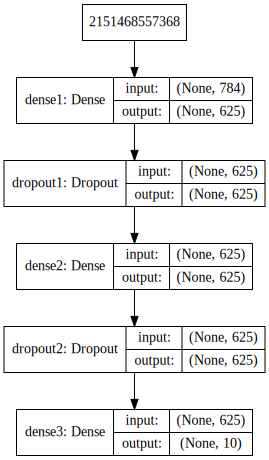

In [6]:
from IPython.display import SVG

from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))